<a href="https://colab.research.google.com/github/Sina8204/learn-make-telegram-bot/blob/main/exercise_TeleBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# آموزش ساخت ربات تلگرام

telebot Document link : https://pypi.org/project/pyTelegramBotAPI/#getting-started

Install telebot module

In [ ]:
!pip install pyTelegramBotAPI

# T1) conect to the bot and send some message.

In [ ]:
import telebot as tb
bot = tb.TeleBot('Bot Token')

@bot.message_handler(commands = ['start'])
def welcome(message):
  bot.send_message(message.chat.id , f'welcom dear')

@bot.message_handler(commands = ['username'])
def welcome(message):
  bot.send_message(message.chat.id , f'welcom dear {message.chat.username}')

@bot.message_handler(commands = ['name'])
def welcome(message):
  bot.send_message(message.chat.id , f'welcom dear {message.chat.first_name}')

bot.polling()

In [ ]:
import telebot as tb
bot = tb.TeleBot('8064045709:AAFd6qIg8UdrsyooR9o27E7n6hHPEeSvYO8')

@bot.message_handler(commands = ['start'])
def welcome(message):
  bot.reply_to(message , 'This is a reply.') # it don't need some id chat.

bot.polling()

#example :
# /start
#reply to 'start' --> this is a reply.

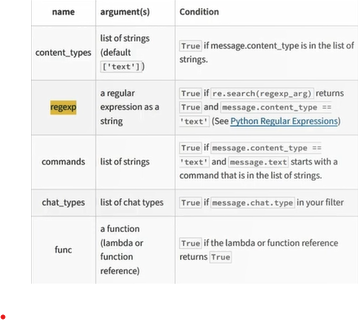

انواع فیلتر:
1) هرگاه نوع خواصی از پیام ها ارسال شد مثل متن ، تصویر ، فایل و یا ... تابعی را اجرا کن.

2) اگر پیام ورودی شامل کاراکتر ها یا رشته های خواصی بود ، تابعی را اجرا کن.

3) با کامند آشنایی داریم

4) چت تایپ هایی را مشخص و به چت تایپ های خواصی چواب داده شود.

5) تابع لامبدا تعریف کنیم و درصورتی که این لامبدا برقرار بود تابع مورد نظر را اجرا کند.

بررسی چند مثال :

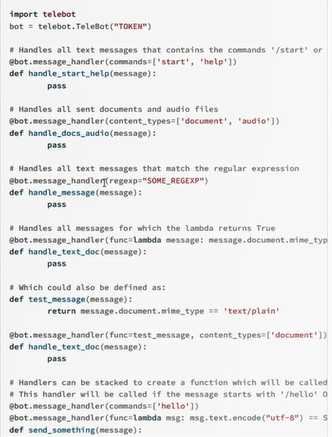

3.png

# پاسخ به انواع پیامهای ورودی

In [ ]:
import telebot
bot = telebot.TeleBot("Token")

In [ ]:
# Handles all text messages that contains the commands '/start' or '/help'.
@bot.message_handler(commands=['start', 'help'])
def handle_start_help(message):
  pass

In [ ]:
# Handles all sent documents and audio files
@bot.message_handler(content_types=['document', 'audio'])
def handle_docs_audio(message):
  if message.audio:
  bot.reply_to(message, "This is an audio file")

  elif message.document:
  bot.reply_to(message, 'This is a document file')

In [ ]:
# Handles all sent documents and audio files
@bot.message_handler(content_types=['document', 'audio'])
def handle_docs_audio(message):
  if message.audio:
    bot.reply_to(message, "This is an audio file")

  elif message.document:
    bot.reply_to(message, 'This is a document file')

In [ ]:
# Handles all text messages that match the regular expression
@bot.message_handler(regexp = "2024")
def handle_message(message):
  bot.reply_to(message, "This message contains 2024")

In [ ]:
#Handles all messages for which the lambda returns True
@bot.message_handler (func=lambda message: message.document.mime_type == 'text/plain' , content_types = ['document'])
def handle_text_doc(message):
  bot.reply_to(message, "This is a text file")

#text/plain --> it's a txt file.

In [ ]:
# Which could also be defined as:
def test_message(message):
  return message.document.mime_type == 'text/plain'

@bot.message_handler(func=test_message, content_types=['document'])
def handle_text_doc(message):
  bot.reply_to(message, "This is a text file...")

In [ ]:
# Handlers can be stacked to create a function which will be called if either m... :)
# This handler will be called if the message starts with '/hello' OR is some em... ;)

@bot.message_handler(commands=['hello']) # *1
@bot.message_handler(func=lambda msg: msg.text == "smile emoji :)") # *2
def send_something(message):
  bot.reply_to(message, 'Emoji')

# if *1 or *2 : run send_something()

In [ ]:
bot.polling()

# قسمت 5 ) دریافت چندین ورودی از کاربر

In [ ]:
import telebot
bot = telebot.TeleBot("Token")

@bot.message_handler(commands=['start'])
def start_message(message):
  bot.send_message(message.chat.id, "Please enter your name:")
  bot.register_next_step_handler(message, process_name)

def process_name(message):
  name = message.text
  bot.send_message(message.chat.id, f"Hello {name}! How old are you?")
  bot.register_next_step_handler(message, process_age)

def process_age(message):
  age = message.text
  bot.send_message(message.chat.id, f"You are {age} years old.\nThank you.")

bot.polling()

register_next_step_handler

متدی است که دو ورودی میگیرد. ورودی دوم آن نام تابع بعدی است که میخواهیم اجرا شود.

خروجی :

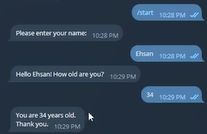

# قسمت 6 ) ربات برای فروشگاه اینترنتی

In [ ]:
from telebot import TeleBot
from config import API_token

bot = TeleBot(API_token)

user_ID = []

@bot.message_handler(commands=['start'])
def welcome(message):
  bot.send_message(message.chat.id, "welcome to microlearn Bot.")
  if message.chat.id not in user_ID:
    user_ID.append(message.chat.id)

@bot.message_handler(commands=['SUPU2024']) # SUPU2024 = send user product update 2024
def send_update(message):
  for id in user_ID:
    bot.send_message(id, "The product is available.")

bot.polling()

کد بالا افرادی که ربات را استارت میکنند ، درصورتی که آیدی شان در user_ID ثبت نشده باشد ، ذخیره یا اضافه میکند.
فرض کنید دستور SUPU2024 برای کاربران عادی قابل دسترسی نباشد و فقط ادمین ربات به آن دسترسی دارد. پس فرض کنید شما ادمین این ربات هستید. درصورتی که دستور SUPU2024 برای ربات ارسال کنید ، برای تمامی کاربرانی که ربات را استارت کردند ، تابع send_update را ارسال میکند.

__________________________________________

# قسمت 07 ) دکمه های شیشه ای و خطی

In [ ]:
from telebot import TeleBot
from config import API_token
from telebot.types import InlineKeyboardButton , InlineKeyboardMarkup

In [ ]:
bot = TeleBot(API_token)

# Defining and adding buttons
button1 = InlineKeyboardButton(text = 'name button 1' , url = "https://google.com")
button2 = InlineKeyboardButton(text = 'name button 2' , url = "https://bing.com")
inline_keyboard = InlineKeyboardMarkup(row_width = 1)
#row_width is how many button can be in a line.
inline_keyboard.add(button1 , button2) # Make keyboard

In [ ]:
# Message handler for the /button1 command

@bot.message_handler(commands=['start'])
def welcome(message):
  bot.send_message(message.chat.id, "welcome to microlearn Bot." , reply_markup = inline_keyboard)

# Callback query handler for the inline keyboard buttons

#Start the bot
bot.polling()

Buttons who have call back data

In [ ]:
from telebot import TeleBot
from config import API_token
from telebot.types import InlineKeyboardButton , InlineKeyboardMarkup

In [ ]:
bot = TeleBot(API_token)

# Defining and adding buttons
button1 = InlineKeyboardButton(text = 'name button 1' , callback_data = "btn1")
button2 = InlineKeyboardButton(text = 'name button 2' , callback_data = "btn2")
inline_keyboard = InlineKeyboardMarkup(row_width = 1)
#row_width is how many button can be in a line.
inline_keyboard.add(button1 , button2) # Make keyboard

In [ ]:
# Message handler for the /button1 command

@bot.message_handler(commands=['start'])
def welcome(message):
  bot.send_message(message.chat.id, "welcome to microlearn Bot." , reply_markup = inline_keyboard)

In [ ]:
# Callback query handler for the inline keyboard buttons
@bot.callback_query_handler(func=lambda call:True)
def check_button(call):
  if call.data == "btn1":
    bot.answer_callback_query(call.id, "Btn1 is tapped.", show_alert=True)

  elif call.data == "btn2":
    bot.answer_callback_query(call.id, "Btn2 is pressed.")

#Start the bot
bot.polling()

#It will know call.id is what.

# قسمت 08 ) ریپلای باتن یا دکمه پاسخ

In [ ]:
from telebot import TeleBot
from config import API_token
from telebot.types import ReplyKeyboardMarkup

In [ ]:
bot = TeleBot(API_token)

# Creating the reply keyboard
reply_keyboard ReplyKeyboardMarkup (resize_keyboard=True, one_time_keyboard=False)
reply_keyboard.add('button1', 'button2')

In [ ]:
# Handling the /start command
@bot.message_handler(commands=['start'])
def welcome(message):
  bot.reply_to(message, "Check the following keyboard.", reply_markup=reply_keyboard)

In [ ]:
# Handling all other messages
@bot.message_handler(func=lambda message: True)
def check_button(message):
  if message.text == 'button1':
    bot.reply_to(message, "button1 is pressed.")

  elif message.text == 'button2':
    bot.reply_to(message, 'button2 is pressed.')

  else:
    bot.reply_to(message, f'Your message is: {message.text}')

# Starting the bot
bot.polling()

نمونه خروجی :

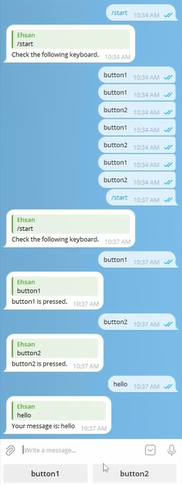

# قسمت 09 ) ساخت دیتابیس برای ربات

# قسمت 10 ) اتصال ربات تلگرام به دیتا بیس

# قسمت 11 ) ربات ادمین گروه

# قسمت 12 ) منو نویسی ربات تلگرام

# قسمت 13 ) عضویت اجباری در کانال تلگرام